In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "./spark-3.1.2-bin-hadoop2.7"
get_ipython().system_raw('pip install pandas')
get_ipython().system_raw('pip install findspark')
get_ipython().system_raw('pip install matplotlib')
import findspark
findspark.init()

/home/thiago/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2607: UserWarning: You executed the system command !pip which may not work as expected. Try the IPython magic %pip instead.
  warnings.warn(


In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[*]') \
    .appName("Iniciando com Spark") \
    .config('spark.ui.port', '4050') \
    .getOrCreate()

#get_ipython().system_raw('./ngrok config add-authtoken YOUR_AUTHTOKEN')
get_ipython().system_raw('./ngrok http 4050 &')

23/10/05 04:07:20 WARN Utils: Your hostname, W10-tks resolves to a loopback address: 127.0.1.1; using 172.25.91.212 instead (on interface eth0)
23/10/05 04:07:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/10/05 04:07:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [7]:
path = './data/clothes_dataset.csv'
roupas = spark.read.csv(path, sep=',', inferSchema=True)

import pandas
roupas.show()

+--------------------+------------+---+------------+-----+--------------------+--------------------+-------------------+---------------+----+----+
|                 _c0|         _c1|_c2|         _c3|  _c4|                 _c5|                 _c6|                _c7|            _c8| _c9|_c10|
+--------------------+------------+---+------------+-----+--------------------+--------------------+-------------------+---------------+----+----+
|Pijama Cirurgico ...|  R$  69,90 | 0%|  R$  69,90 | 1000|TORONTO UNIFORMES...|           Poliéster|         Sem gênero|            N/A|   4| 273|
|Kit 10 Cuecas Box...| R$  274,81 |18%| R$  232,89 |10000|                Lupo|             Algodão|          Masculino| Outono/Inverno| 4,5|3034|
|Kit Com 10 Cuecas...| R$  239,88 |20%| R$  199,90 |50000|               Zorba|             Algodão|          Masculino|            N/A| 4,7|5682|
|Kit 10 Cuecas Box...| R$  279,86 |22%| R$  229,39 |10000|                Mash|             Algodão|          Masculin

In [8]:
roupasColNames = [
    'titulo', 
    'preco_original', 
    'desconto_percentual', 
    'preco_com_desconto', 
    'n_vendidos_categoria', 
    'marca', 
    'material',
    'gênero',
    'temporada',
    'nota',
    'n_avaliações'
]
for index, colname in enumerate(roupasColNames):
    roupas = roupas.withColumnRenamed(f"_c{index}", colname)

roupas = roupas.na.drop("any")
roupas.toPandas()

,titulo,preco_original,desconto_percentual,preco_com_desconto,n_vendidos_categoria,marca,material,gênero,temporada,nota,n_avaliações
0,Pijama Cirurgico Scrub Roupa Privativa Hospit...,"R$ 69,90",0%,"R$ 69,90",1000,TORONTO UNIFORMES PROFISSIONAIS,Poliéster,Sem gênero,N/A,4,273
1,Kit 10 Cuecas Boxer Lupo Cueca Box Algodão Mas...,"R$ 274,81",18%,"R$ 232,89",10000,Lupo,Algodão,Masculino,Outono/Inverno,"4,5",3034
2,Kit Com 10 Cuecas Boxer Algodão Sem Costura Zo...,"R$ 239,88",20%,"R$ 199,90",50000,Zorba,Algodão,Masculino,N/A,"4,7",5682
3,Kit 10 Cuecas Boxer Mash Algodão Cotton Box Or...,"R$ 279,86",22%,"R$ 229,39",10000,Mash,Algodão,Masculino,Primavera/Verão,"4,6",1700
4,Kit 3 Short Jeans Feminino Cintura Alta Barato...,"R$ 140,83",9%,"R$ 129,20",1000,Menina Linda,Jean,Feminino,Primavera/Verão,"4,4",507
...,...,...,...,...,...,...,...,...,...,...,...
1554,Kit 4 Bermudas Plusais Estampada Caminhada Ult...,"R$ 117,58",11%,"R$ 105,93",25,Feminina Academia Atacado,Poliéster,Feminino,Primavera/Verão,"2,3",4
1555,Roupinha Bebê Ensaio Newborn Body Laço E Faixa...,"R$ 42,00",0%,"R$ 42,00",100,Roupinha Para Ensaio,N/A,Bebês,N/A,"4,4",34
1556,Calça Levi´s 511 Slim Com Elastano Ref Lb5110018,"R$ 318,90",0%,"R$ 318,90",100,Levi's,Algodão com elastano,Masculino,Outono/Inverno,"4,5",14
1557,Bermuda Masculina Tática Thunder Poly Ripstop ...,"R$ 131,78",10%,"R$ 119,80",5,Use Tático,Poliéster,Masculino,Primavera/Verão,"4,3",3


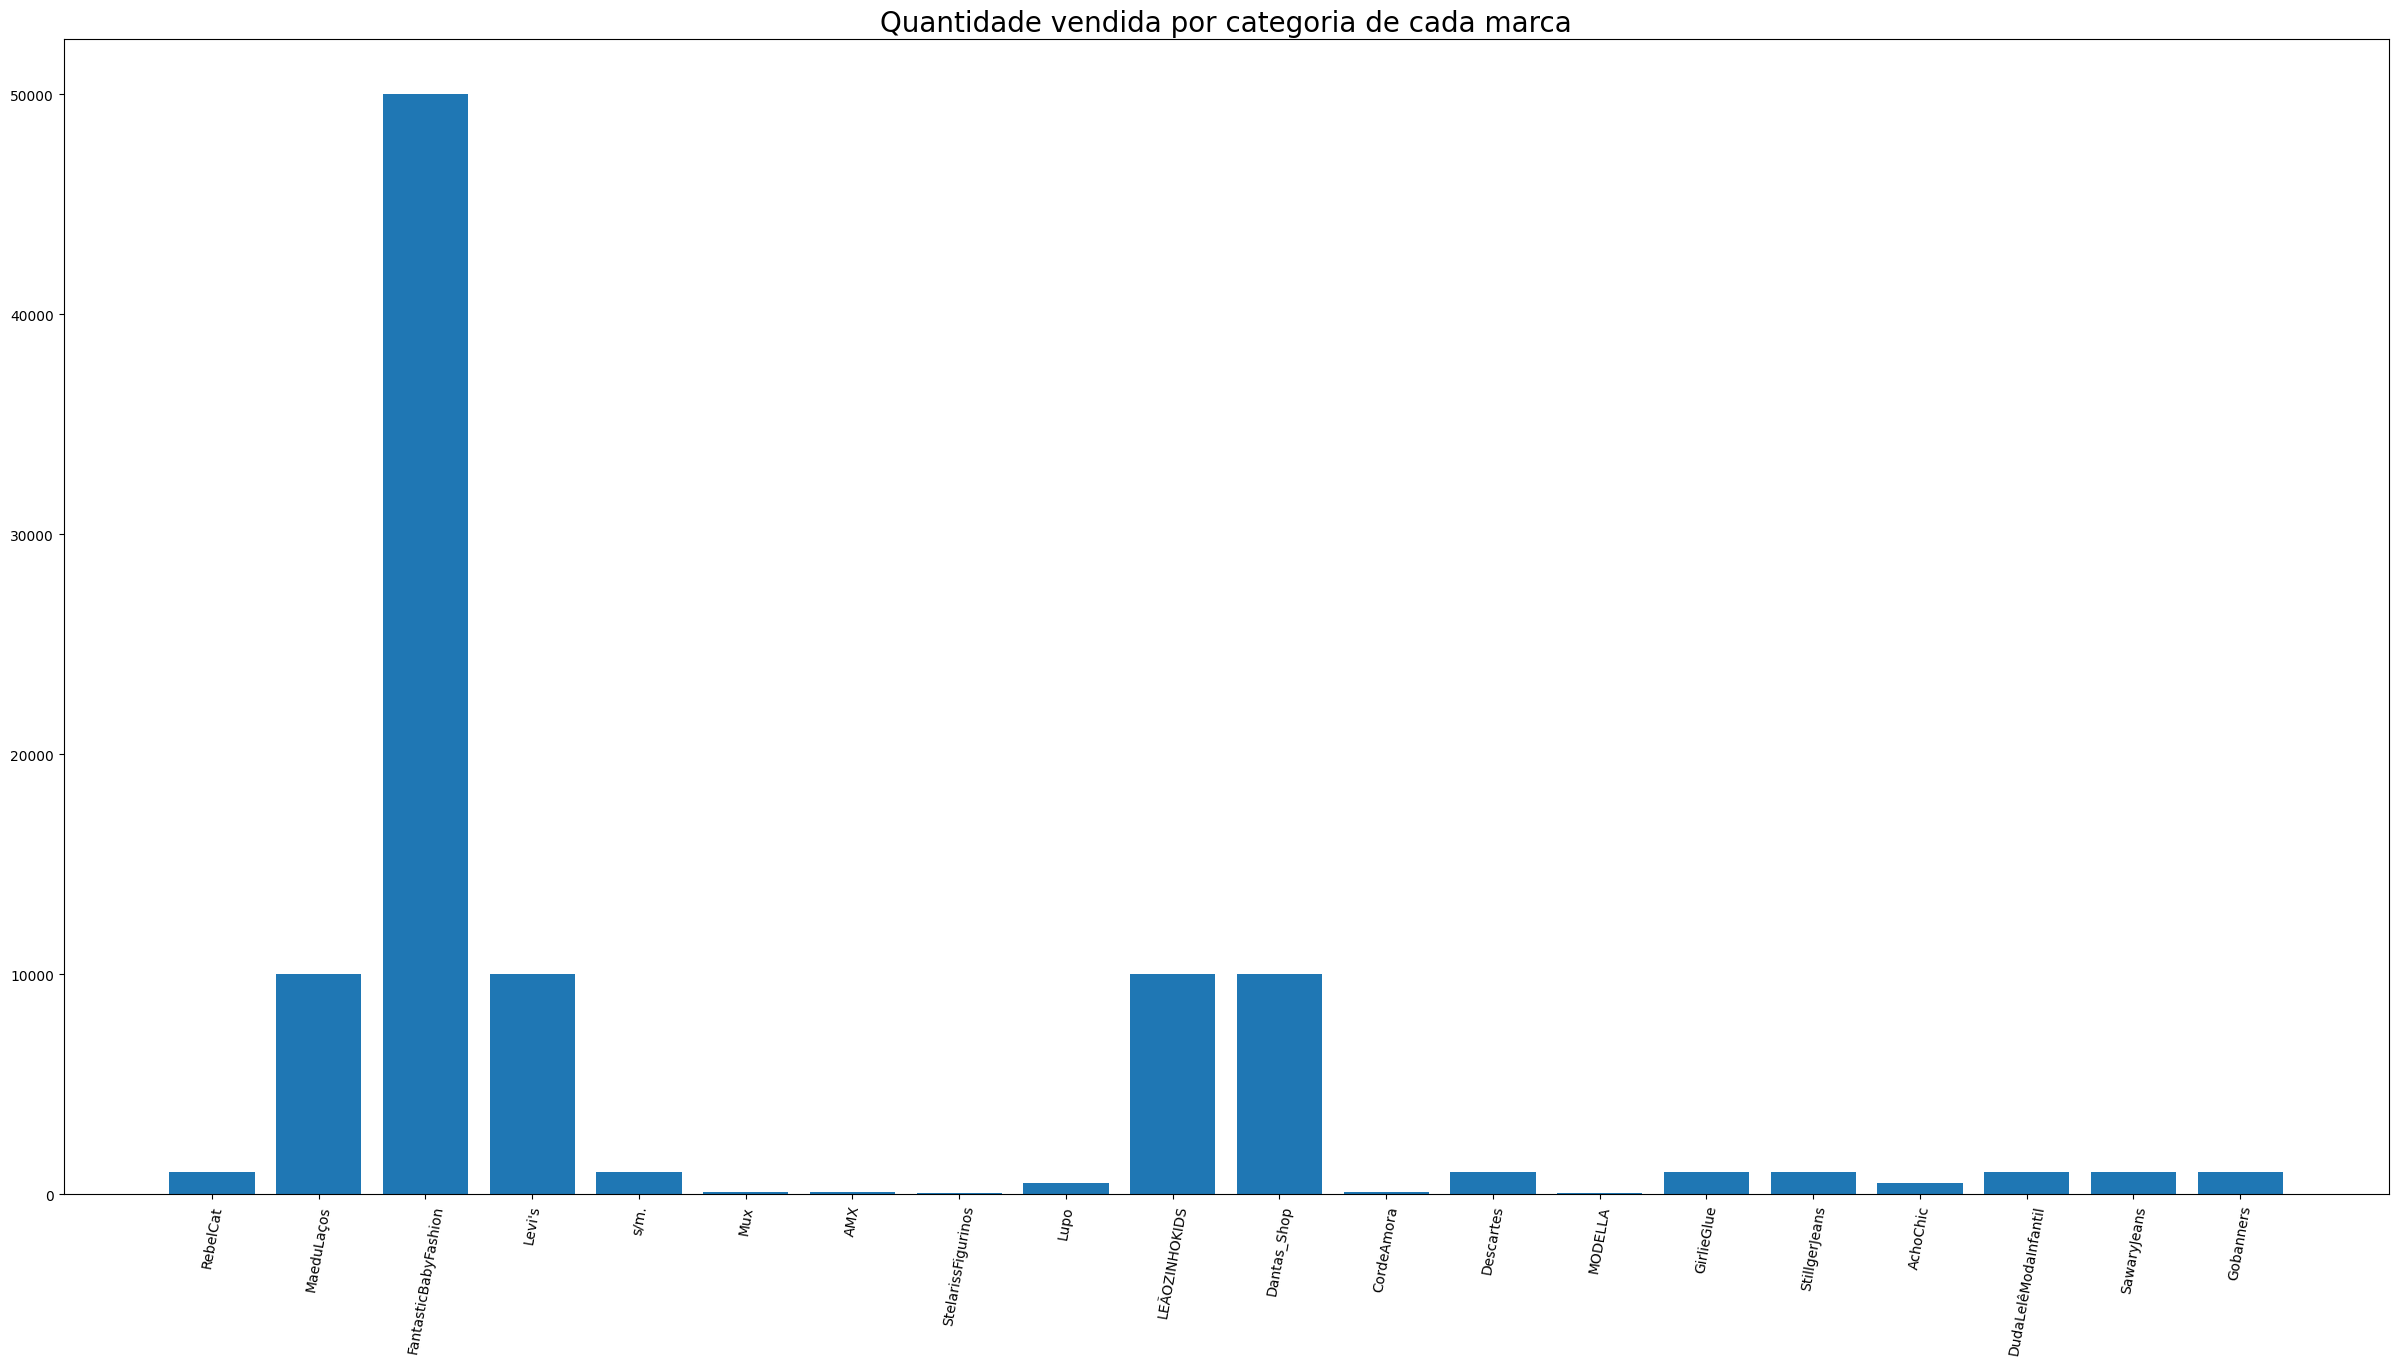

In [9]:
from matplotlib import pyplot as plt
import numpy as np

valores_x = [
    row[0].replace(' ', '') for row in
    roupas.distinct().limit(20).select("marca").collect()
]
valores_y = [
    float(row[0]) for row in
    roupas.na.drop("any").limit(20).select("n_vendidos_categoria").collect()
]




plt.figure(figsize=(30, 15))
plt.title("Quantidade vendida por categoria de cada marca", fontsize=20)
plt.bar(valores_x, valores_y)
plt.xticks(rotation=80)
plt.show()


In [128]:
get_ipython().system_raw('pip install squarify')

/home/thiago/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:2607: UserWarning: You executed the system command !pip which may not work as expected. Try the IPython magic %pip instead.
  warnings.warn(


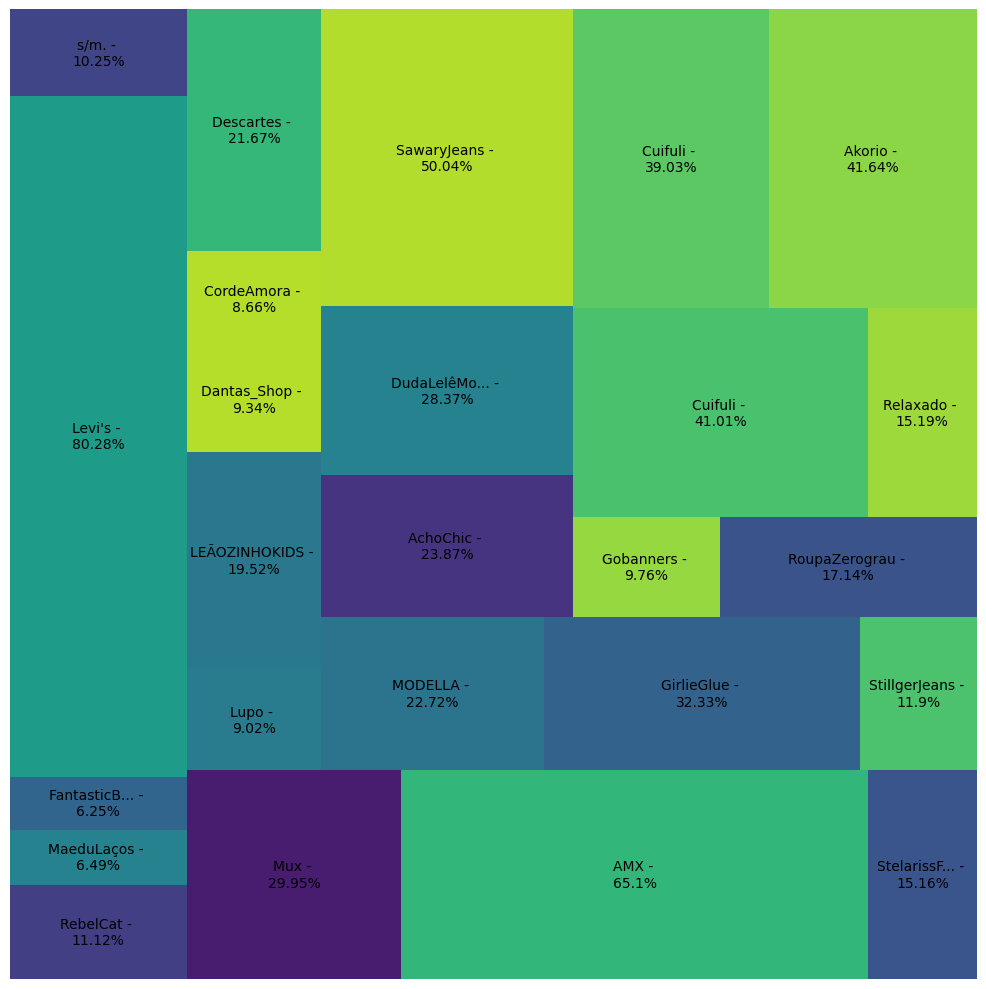

In [69]:
import matplotlib
import squarify
import matplotlib.cm as cm


marcas = [
    row[0].replace(' ', '') for row in
    roupas.distinct().limit(25).select("marca").collect()
]
porcentagens = [
    round((float(row[0].replace(' R$ ', '').replace(' ','').replace(',','.')) * 100) / max(valores_y),2)for row in
    roupas.distinct().limit(25).select("preco_original").collect()
]
valores
valores_x = [
    (marcas[index] if len(marcas[index]) < 15 else marcas[index][:10] + "...") + " - \n" +
    str(porcentagens[index]) + "%"
    for (index, row) in 
    enumerate(roupas.distinct().limit(25).select("preco_original").collect())
]
plt.figure(figsize=(10, 10))
grafico = squarify.plot(sizes=porcentagens, label=valores_x)
plt.axis('off');
plt.tight_layout()

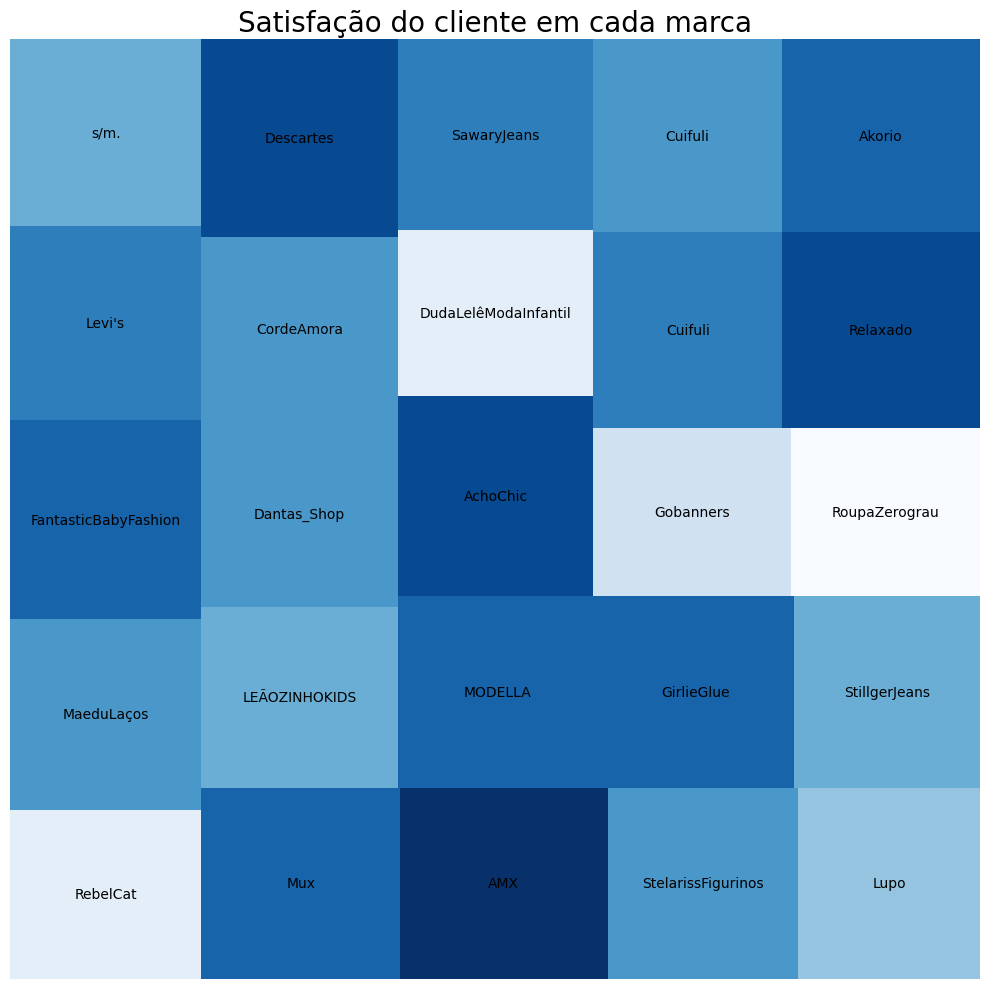

In [55]:
import matplotlib
import squarify

valores_y = [
    float(row[0].replace(',','.')) for row in
    roupas.limit(25).select("nota").collect()
]
valores_x = [
    row[0].replace(' ', '') for row in
    roupas.distinct().limit(25).select("marca").collect()
]
# Definindo a paleta de cores para o treemap
cmap = matplotlib.cm.Blues
mini = min(valores_y)
maxi = max(valores_y)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(i)) for i in valores_y]

plt.figure(figsize=(10, 10))
squarify.plot(sizes=valores_y, label=valores_x, color=colors);
plt.title('Satisfação do cliente em cada marca', fontsize=20)
plt.axis('off');
plt.tight_layout()

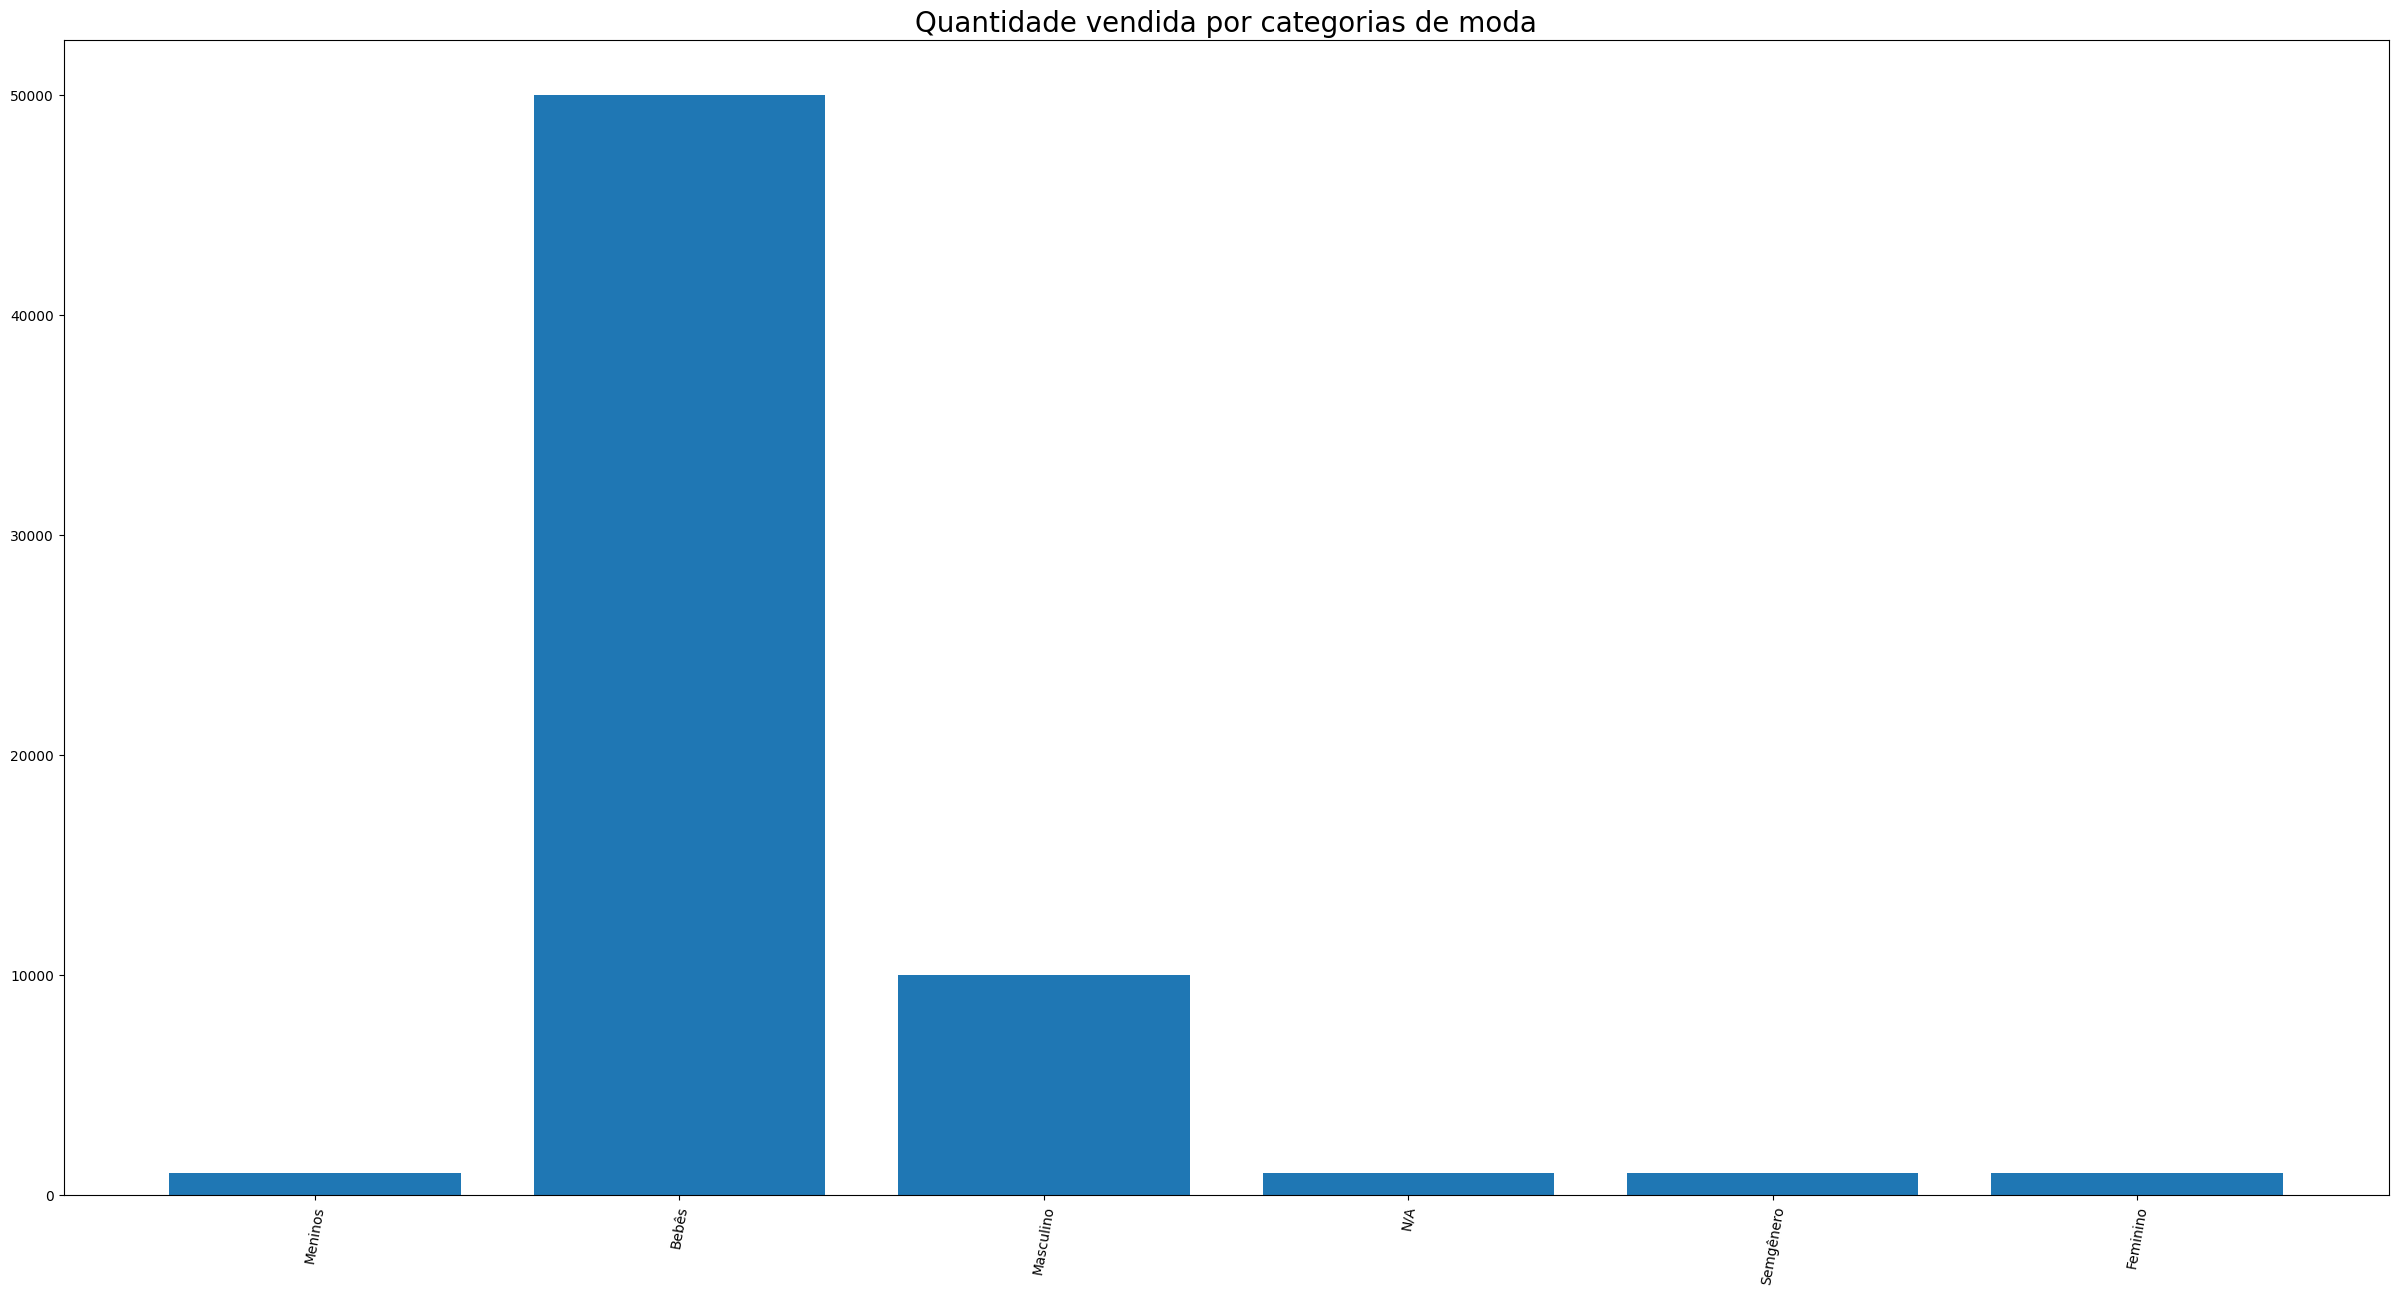

In [159]:
valores_x = [
    row[0].replace(' ', '') for row in
    roupas.distinct().limit(20).select("gênero").collect()
]
valores_y = [
    float(row[0]) for row in
    roupas.na.drop("any").limit(20).select("n_vendidos_categoria").collect()
]
plt.figure(figsize=(30, 15))
plt.title("Quantidade vendida por categorias de moda", fontsize=20)
plt.bar(valores_x, valores_y)
plt.xticks(rotation=80)
plt.show()

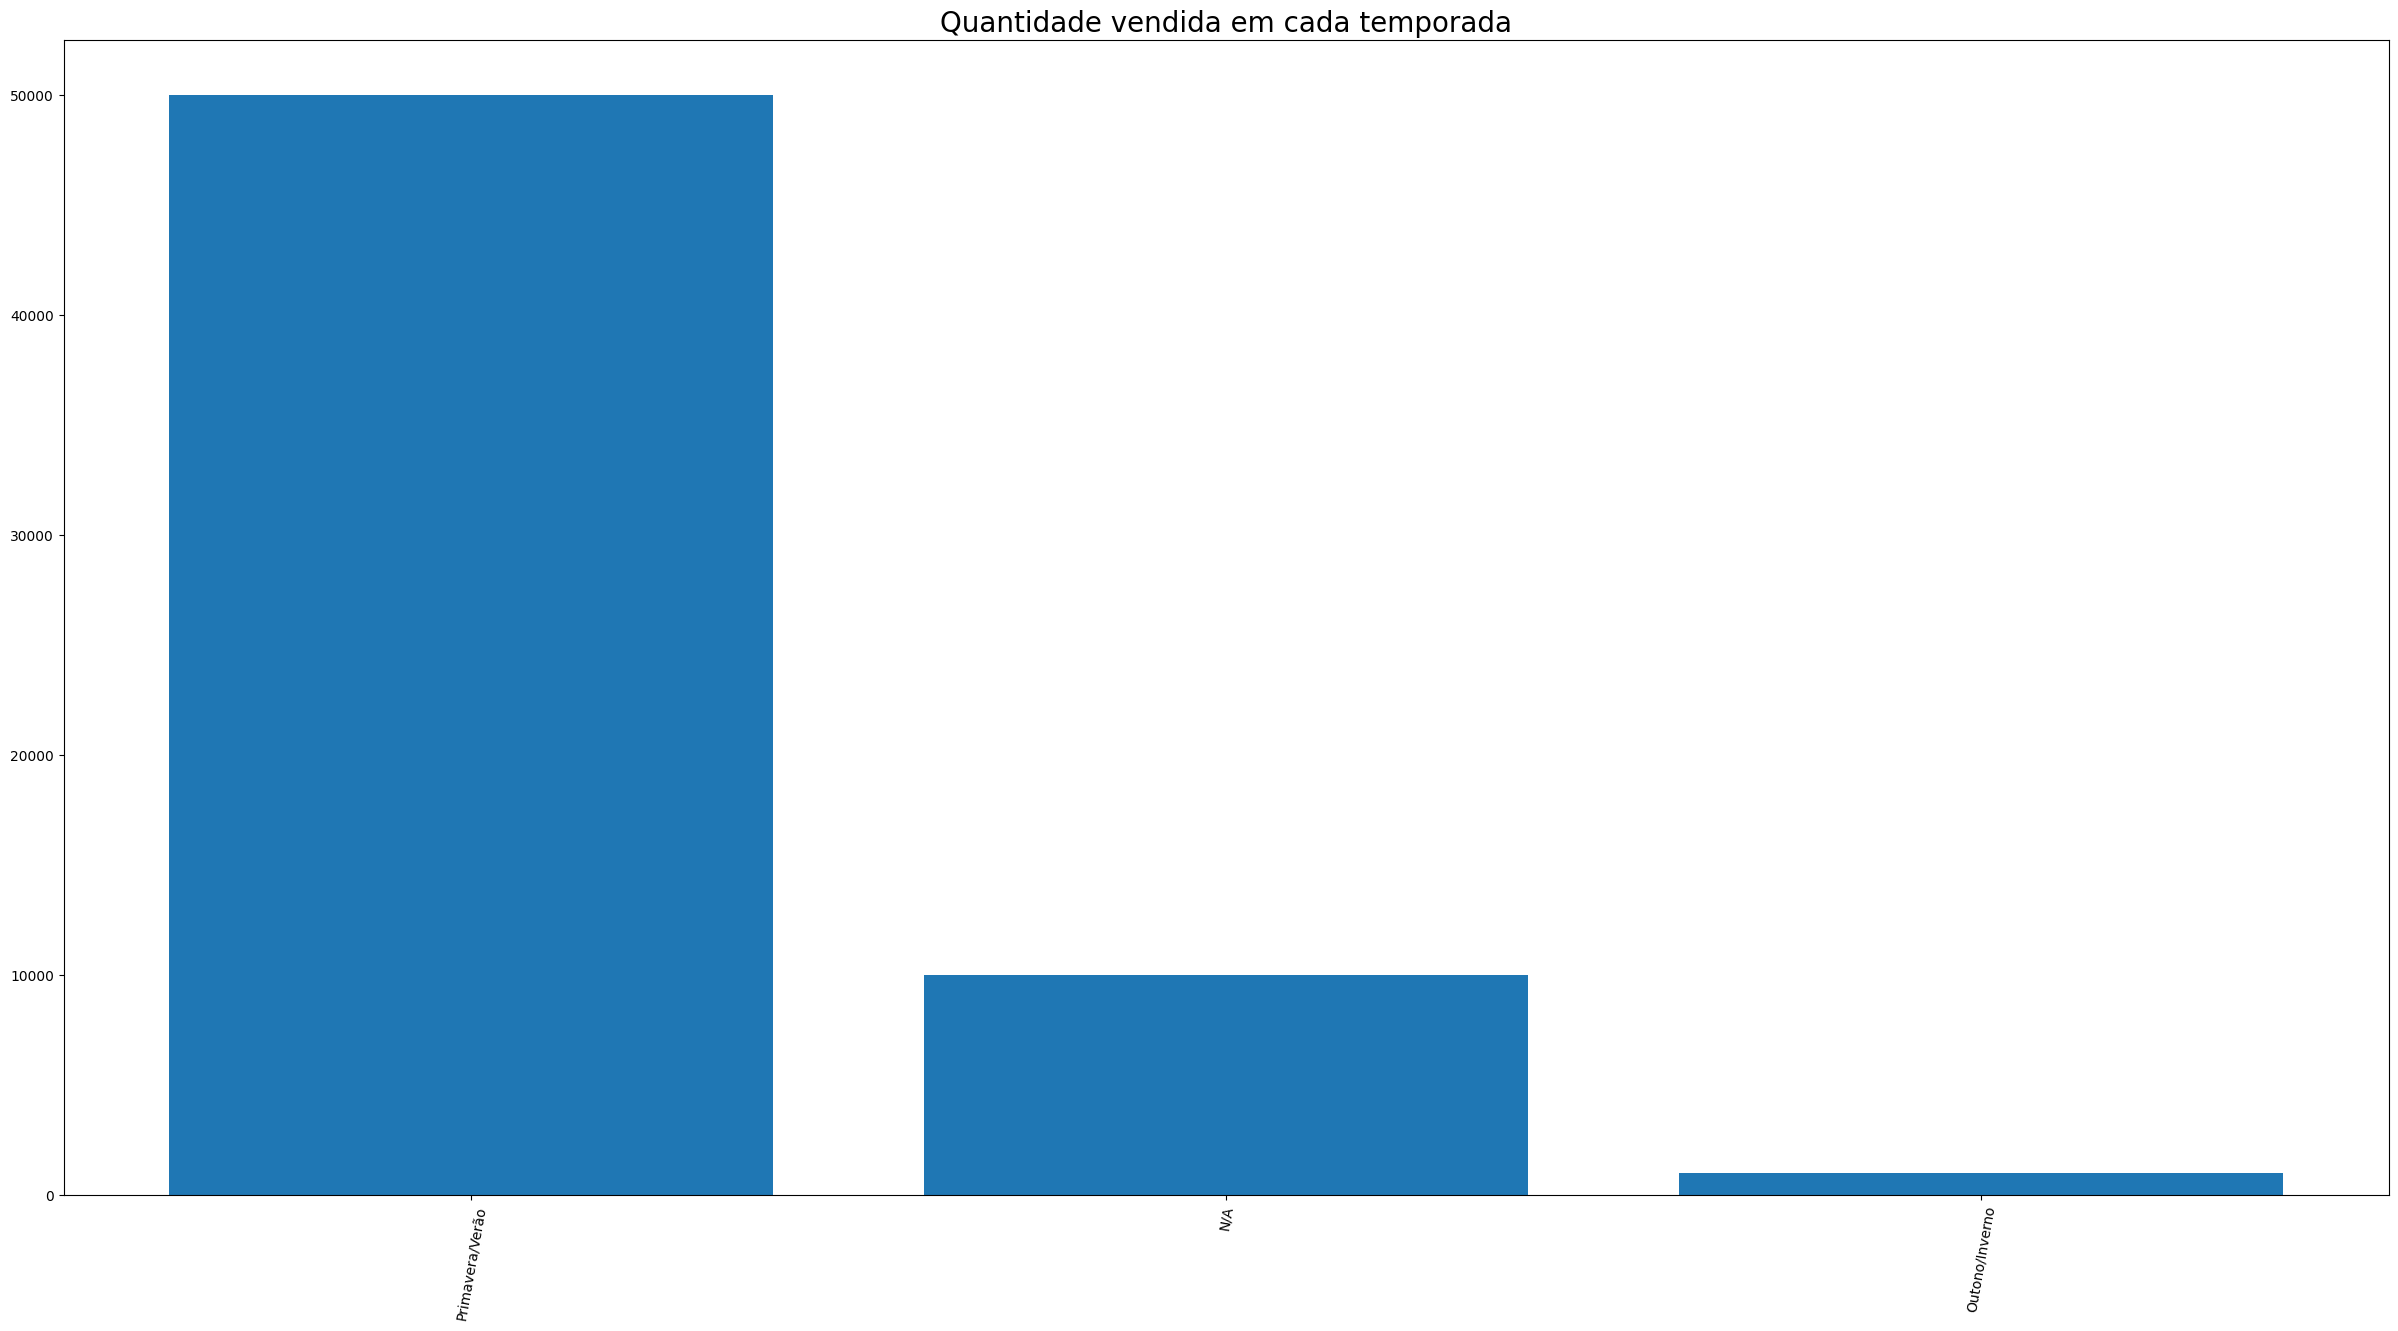

In [165]:
import matplotlib
import squarify
valores_x = [
    row[0].replace(' ', '') for row in
    roupas.distinct().limit(20).select("temporada").collect()
]
valores_y = [
    float(row[0]) for row in
    roupas.na.drop("any").limit(20).select("n_vendidos_categoria").collect()
]
# Definindo a paleta de cores para o treemap
cmap = matplotlib.cm.Blues
maxi = max(valores_y)
norm = matplotlib.colors.Normalize(vmin=0, vmax=maxi)
colors = [cmap(norm(i)) for i in valores_y]

plt.figure(figsize=(30, 15))
plt.title("Quantidade vendida em cada temporada", fontsize=20)
plt.bar(valores_x, valores_y)
plt.xticks(rotation=80)
plt.show()